# TP de synthese d'image : Courbes de Bezier


Etudiant : Noe Marzat

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import pascal

Fonctions codées pour le TP

In [9]:
def coef_pascal(n : int):
    """Genere les coefficients de pascal correspond à la ligne n. Correspond aussi au nombre de coefficients voulu

    Args:
        n (int): Nombre de coefficients voulu

    Returns:
        array_like: Coefficients du triangle de Pascal correspondant à la ligne voulu
    """
    triangle = pascal(n)
    coefficients = np.flip(triangle, axis=1).diagonal()
    return coefficients


def bernstein(points, nombre_points_trace):
    """Calcule les points pour le tracer de la courbes de Bezier en utilisant le polynome de Bernstein et le triangle de Pascal

    Args:
        points (array_like): Liste contenant les points de controle
        nombre_points_trace (int): nombre de points à tracer entre le premier point de controle et le dernier

    Returns:
        array_like: Liste des points à tracer
    """
    #Initialisations
    nombre_points = len(points)
    coefficients = coef_pascal(len(points))
    nouveaux_points = []
    u_list = np.linspace(0,1,nombre_points_trace)

    # Pour chaque points désiré on calcul un nouveau point avec le polynome de bernstein
    for indice_point in range(0, nombre_points_trace) :
        u = u_list[indice_point]
        
        membre = []
        for coef,point,i in zip(coefficients, points, range(0, nombre_points)):
            membre.append(coef * u**i * (1-u)**(nombre_points-i-1) * point)
        nouveaux_points.append(sum(membre))

    return np.array(nouveaux_points)

## Question 1 :

Les étudiants doivent implémenter les courbes de Bézier avec le triangle de Pascal et les tester sur une courbe simple (4 ou 5 points de contrôle)

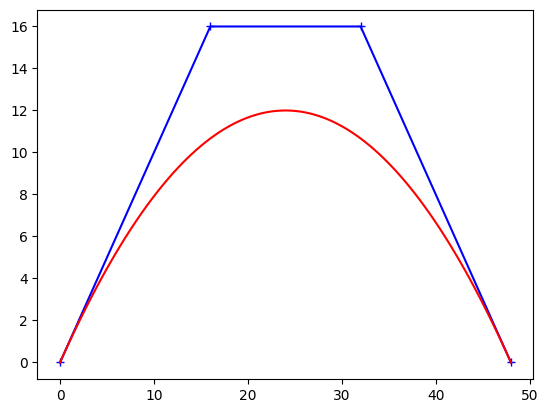

In [10]:
# Forme Simple (4 points)
points_controle = np.array([(0,0),(16,16),(32,16),(48,0)])

nouveaux_points = bernstein(points_controle,100)

plt.plot([x for x,_ in points_controle], [y for _,y in points_controle], c='b', marker='+')
plt.plot([x for x,_ in nouveaux_points], [y for _,y in nouveaux_points], c='r')
plt.show()

## Question 2 :

Une fois implémentée, les étudiants testent le tracé de courbes avec un tracé complexe incluant une boucle et un minimum de 13 points de contrôle

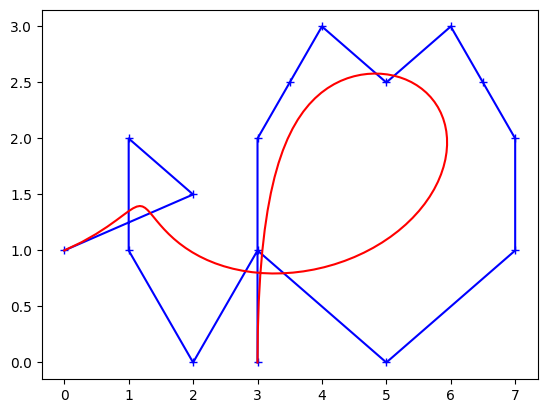

In [11]:
# Forme complexe (16 points)

points_controle = np.array([(3,0),(3,2),(3.5,2.5),(4,3),(5,2.5),(6,3),(6.5,2.5),(7,2),(7,1),(5,0),(3,1),(2,0),(1,1),(1,2),(2,1.5),(0,1)])

nouveaux_points = bernstein(points_controle,100)

plt.plot([x for x,_ in points_controle], [y for _,y in points_controle], c='b', marker='+')
plt.plot([x for x,_ in nouveaux_points], [y for _,y in nouveaux_points], c='r')
plt.show()

## Question 3

Ce dernier tracé est ensuite réalisé avec des Béziers cubiques par morceaux en gérant la continuité de raccord "à la main"

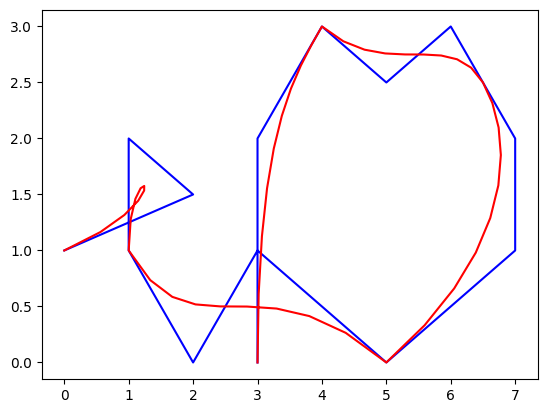

In [12]:
# Meme forme (16 points) mais en Bezier cubique par morceaux (ça devait etre un chat et sa queue)

points_controle = np.array([(3,0),(3,2),(3.5,2.5),(4,3),(5,2.5),(6,3),(6.5,2.5),(7,2),(7,1),(5,0),(3,1),(2,0),(1,1),(1,2),(2,1.5),(0,1)])

nouveaux_points = []
for i in range(0,len(points_controle),3):
    points_temp = points_controle[i:i+4]
    nouveaux_points.append(bernstein(points_temp,10))
nouveaux_points = np.concatenate(nouveaux_points)

plt.plot([x for x,_ in points_controle], [y for _,y in points_controle], c='b')  
plt.plot([x for x,_ in nouveaux_points], [y for _,y in nouveaux_points], c='r')
plt.show()

## Question 4

Les étudiants peuvent ensuite expérimenter librement le tracé de formes avec des courbes de Bézier (autres courbes complexes, par morceaux, ouverte, fermée, etc)

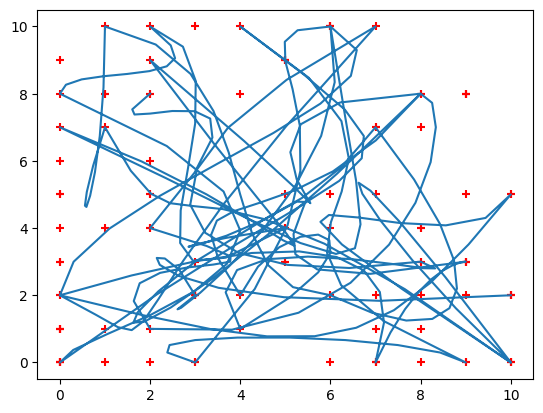

In [13]:
import random as rand

# Generation des points
def generate_control_points(n: int, max_range : int = 10):
    points = []
    for i in range(0,n):
        points.append((rand.randint(0,max_range),rand.randint(0,max_range)))
    return np.array(points)

def draw_bezier_par_morceaux(points_controle):
    nouveaux_points = []
    for i in range(0,len(points_controle),3):
        points_temp = points_controle[i:i+4]
        nouveaux_points.append(bernstein(points_temp,10))
    nouveaux_points = np.concatenate(nouveaux_points)

    plt.scatter([x for x,_ in points_controle], [y for _,y in points_controle], c='r', marker='+')    
    plt.plot([x for x,_ in nouveaux_points], [y for _,y in nouveaux_points])
    plt.show()


points_controle_rand = generate_control_points(100)
draw_bezier_par_morceaux(points_controle_rand)


PS : Je ne m'attendais pas à grand chose en codant ça mais je suis quand même deçu